


# Lab: So sánh hiệu suất giữa Random Forest và XGBoost
Estimated time needed: **20** minutes
    

## Objectives


Sau khi hoàn thành bài lab, sinh viên có thể:

* Sử dụng được thư viện cần thiết để xây dựng được mô hình với Random forest và XGBoost
* So sánh được 2 mô hình



## Introduction
Trong bài lab này, bạn sẽ xây dựng và đánh giá hiệu năng tương đối của hai mô hình hồi quy Random Forest và XGBoost trong bài toán dự đoán giá nhà, sử dụng bộ dữ liệu California Housing.
Ở đây, “hiệu năng (performance)” được hiểu theo hai khía cạnh:

Tốc độ (thời gian huấn luyện và dự đoán)

Độ chính xác (mức độ dự đoán đúng)

Cài đặt thư viện cần thiết


In [2]:
%pip install numpy==2.2.0
%pip install scikit-learn==1.6.0
%pip install matplotlib==3.9.3
%pip install xgboost==2.1.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.4 MB/s  0:00:28 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 2.9 MB/s  0:02:10 eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.


Import thư viện cần thiết


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
from lightgbm import LGBMRegressor

In [ ]:
# Load dữ liệu:  California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target  # type: ignore

# Chia tập train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Exercise 1: Bộ dữ liệu có những đặc trưng nào?


In [ ]:
N_observations, N_features = X.shape
print("Number of Observations: " + str(N_observations))
print("Number of Features: " + str(N_features))


Number of Observations: 20640
Number of Features: 8


<details><summary>Click here for the solution</summary>

```python

N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))


```

</details>


### Initialize models
Trong bước này, bạn sẽ xác định số lượng base estimators, hay còn gọi là các cây riêng lẻ (individual trees), được sử dụng trong mỗi mô hình, sau đó khởi tạo các mô hình hồi quy Random Forest và XGBoost.

Ta sẽ chỉ sử dụng các tham số mặc định (default parameters) để thực hiện việc so sánh hiệu năng giữa hai mô hình.

Là một phần của quá trình so sánh hiệu năng, chúng ta cũng sẽ đo thời gian huấn luyện (training time) của cả hai mô hình.


In [9]:
# Initialize models
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)
lgbm = LGBMRegressor(n_estimators=n_estimators, random_state=42)

In [10]:
# Fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

# Measure training time for lgbm
start_time_lgbm = time.time()
lgbm.fit(X_train, y_train)
end_time_lgbm = time.time()
lgbm_train_time = end_time_lgbm - start_time_lgbm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


### Exercise 2. Sử dụng các mô hình đã được huấn luyện để thực hiện dự đoán trên tập dữ liệu kiểm tra (test set).

Đồng thời, hãy đo thời gian dự đoán của từng mô hình bằng cách sử dụng hàm time.time() để ghi nhận thời điểm trước và sau khi mỗi mô hình thực hiện dự đoán.

Khoảng chênh lệch giữa hai thời điểm này chính là thời gian dự đoán (prediction time) của mô hình.


In [ ]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

# Measure prediciton time for lgbm
start_time_lgbm = time.time()
y_pred_lgbm = lgbm.predict(X_test)
end_time_lgbm = time.time()
lgbm_pred_time = end_time_lgbm - start_time_lgbm


/home/nphuoctho/Documents/MySpace/Python/learn-python/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


<details><summary>Click here for the solution</summary>

```python
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

```

</details>


### Exercise 3:  Tính các chỉ số MSE và R^2 cho cả 2 mô hình


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)  # type: ignore

r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_lgbm = r2_score(y_test, y_pred_lgbm)  # type: ignore

<details><summary>Click here for the solution</summary>

```python
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
```

</details>


### Exercise 4:  In các chỉ số MSE va R^2 của cả 2 mô hình
CatBoost


In [ ]:
print(f"Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}")
print(f"      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}")
print(f"         lgbm:  MSE = {mse_lgbm:.4f}, R^2 = {r2_lgbm:.4f}")


Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
         lgbm:  MSE = 0.2148, R^2 = 0.8360


<details><summary>Click here for the solution</summary>

```python

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
```

</details>


Từ các giá trị MSE và R², có thể thấy rằng XGBoost cho kết quả tốt hơn Random Forest, tuy nhiên mức độ chênh lệch giữa hai mô hình không quá lớn.


### Exercise 5:  In các thời gian train và test của 2 mô hình


In [ ]:
print(
    f"Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds"
)
print(
    f"      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds"
)
print(
    f"         lgbm:  Training Time = {lgbm_train_time:.3f} seconds, Testing time = {lgbm_pred_time:.3f} seconds"
)


Random Forest:  Training Time = 10.083 seconds, Testing time = 0.084 seconds
      XGBoost:  Training Time = 0.547 seconds, Testing time = 0.008 seconds
         lgbm:  Training Time = 0.220 seconds, Testing time = 0.007 seconds


<details><summary>Click here for the solution</summary>

```python
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
```

</details>


Điều rất ấn tượng là sự khác biệt về thời gian tính toán giữa XGBoost và Random Forest, ở cả giai đoạn huấn luyện (training) lẫn giai đoạn kiểm tra/dự đoán (testing).


Tiếp theo, bạn sẽ vẽ các biểu đồ scatter giữa giá trị dự đoán và giá trị thực tế cho cả hai mô hình, nhằm đánh giá trực quan mức độ hoạt động của từng mô hình.

Đồng thời, chúng ta sẽ vẽ các đường nằm trên và dưới đường lý tưởng một độ lệch chuẩn của dữ liệu test.
Đường lý tưởng này đại diện cho mô hình hồi quy hoàn hảo, trong đó tất cả các dự đoán đều chính xác.

### Exercise 6. Calculate the standard deviation of the test data


In [ ]:
std_y = np.std(y_test)

<details><summary>Click here for the solution</summary>

``` python
# Standard deviation of y_test
std_y = np.std(y_test)
```

</details>


In [ ]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

# Measure prediciton time for lgbm
start_time_lgbm = time.time()
y_pred_lgbm = lgbm.predict(X_test)
end_time_lgbm = time.time()
lgbm_pred_time = end_time_lgbm - start_time_lgbm

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)  # type: ignore
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_lgbm = r2_score(y_test, y_pred_lgbm)  # type: ignore


print(f"Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}")
print(f"      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}")
print(f"         lgbm:  MSE = {mse_lgbm:.4f}, R^2 = {r2_lgbm:.4f}")
print(
    f"Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds"
)
print(
    f"      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds"
)
print(
    f"         lgbm:  Training Time = {lgbm_train_time:.3f} seconds, Testing time = {lgbm_pred_time:.3f} seconds"
)
std_y = np.std(y_test)

Random Forest:  MSE = 0.2556, R^2 = 0.8050
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
         lgbm:  MSE = 0.2148, R^2 = 0.8360
Random Forest:  Training Time = 10.083 seconds, Testing time = 0.086 seconds
      XGBoost:  Training Time = 0.547 seconds, Testing time = 0.001 seconds
         lgbm:  Training Time = 0.220 seconds, Testing time = 0.011 seconds


/home/nphuoctho/Documents/MySpace/Python/learn-python/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Visualize the results


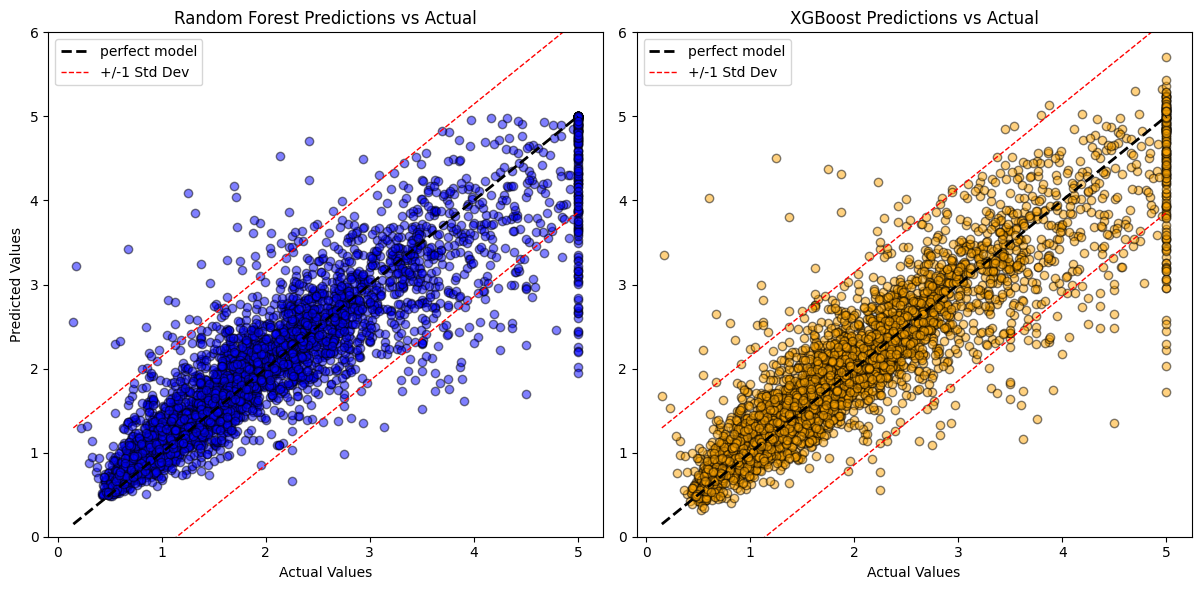

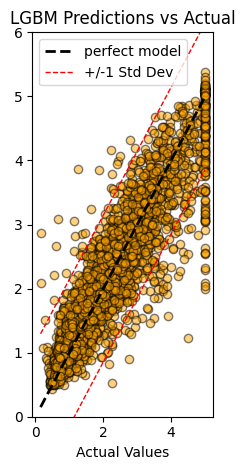

In [ ]:
plt.figure(figsize=(18, 6))

# Random Forest plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", ec="k")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "k--",
    lw=2,
    label="perfect model",
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min() + std_y, y_test.max() + std_y],
    "r--",
    lw=1,
    label="+/-1 Std Dev",
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min() - std_y, y_test.max() - std_y],
    "r--",
    lw=1,
)
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange", ec="k")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "k--",
    lw=2,
    label="perfect model",
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min() + std_y, y_test.max() + std_y],
    "r--",
    lw=1,
    label="+/-1 Std Dev",
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min() - std_y, y_test.max() - std_y],
    "r--",
    lw=1,
)
plt.ylim(0, 6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

# lgbm plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lgbm, alpha=0.5, color="orange", ec="k")  # type: ignore
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "k--",
    lw=2,
    label="perfect model",
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min() + std_y, y_test.max() + std_y],
    "r--",
    lw=1,
    label="+/-1 Std Dev",
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min() - std_y, y_test.max() - std_y],
    "r--",
    lw=1,
)
plt.ylim(0, 6)
plt.title("LGBM Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Cả hai mô hình đều hoạt động rất tốt. Phần lớn các dự đoán của chúng nằm trong phạm vi một độ lệch chuẩn của giá trị mục tiêu.

Điều đáng chú ý là Random Forest “tôn trọng” cận trên (giá trị lớn nhất) có trong biến mục tiêu bằng cách giữ các dự đoán trong giới hạn này, trong khi XGBoost có xu hướng “vượt ngưỡng” (overshoot), tức là dự đoán vượt quá cận trên đó.


### Congratulations! You're ready to move on to your next lesson.

